# Hyper Island School Project

In [13]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from statsmodels.formula.api import logit
import numpy as np
from itertools import product 
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

# Simple Linear Regression
My task here was to investigate the relationship between 'TV' and 'Sales'

I'll start by importing the data, explore it, and clean if nessescary. 

In [14]:
df = pd.read_csv('Advertising_data_Linear_Reg.csv')

In [15]:
df.head()
#df.shape
#df.info()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [16]:
missing = df.isna()
df[missing].sum()

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

Then plotting the existing data to see if there is a linear relationship. 

<Figure size 360x360 with 0 Axes>

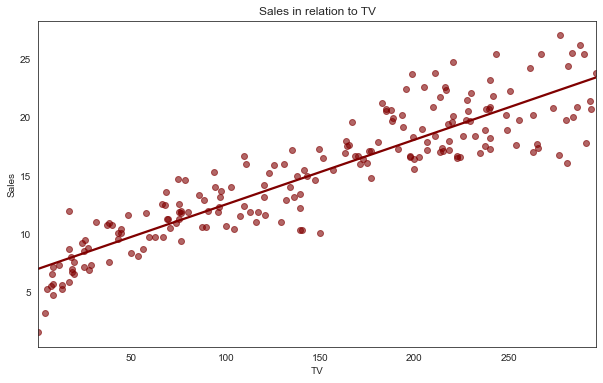

In [301]:
plt.clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
fig = sns.regplot(x='TV', y='Sales', data=df, ci=None, scatter_kws={"alpha": 0.6} , color='maroon')
plt.title('Sales in relation to TV')
plt.show()

A linear trend is visible. No extreme outliers.

I then run a prediction model for TV vs Sales, to visualise on top of the existing data

In [18]:
tv_vs_sales = ols('Sales ~ TV', data = df).fit()

In [78]:
explanatory_data = pd.DataFrame({'TV': np.arange(0, 325, 25)})

In [79]:
predictions_df = explanatory_data.assign(Sales= tv_vs_sales.predict(explanatory_data))

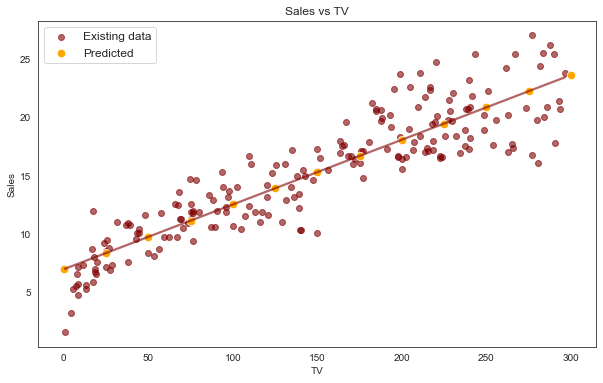

In [300]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.regplot(x='TV', y='Sales', data=df, ci=None, color='maroon', scatter_kws={"alpha": 0.6}, line_kws={"alpha": 0.6}, label='Existing data')
sns.scatterplot(x='TV', y='Sales', data=predictions_df, color='orange', s=70, label='Predicted')
plt.legend(fontsize='large')
plt.title('Sales vs TV')
plt.show()

According to above, the model follows the trendline. To assess that the model is a good fit, I will 
quantifty and visualise it. 

In [22]:
mean_resid = np.round(np.mean(tv_vs_sales.resid), 2)
print('The mean of the residuals is: ' + str(mean_resid))

The mean of the residuals is: -0.0


A mean close to 0 is a sign of a good model fit. This can also be visualized:

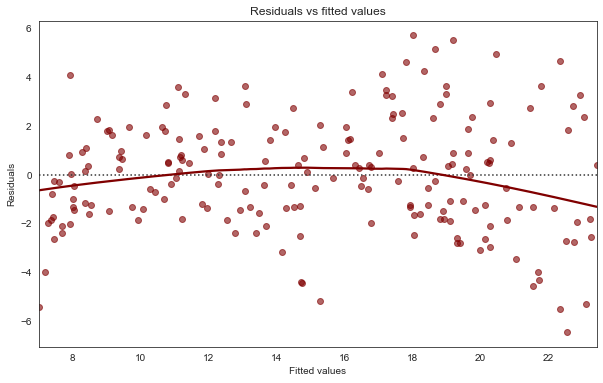

In [299]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.residplot(x=tv_vs_sales.fittedvalues, y=tv_vs_sales.resid, data=tv_vs_sales, lowess=True, color='maroon', scatter_kws={"alpha": 0.6})
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted values')
plt.title('Residuals vs fitted values')
plt.show()

In [87]:
rsquared = np.round(tv_vs_sales.rsquared, 3)
mse = tv_vs_sales.mse_resid
rse = np.round(np.sqrt(mse),3)
print('An r-squared ratio of ' + str(rsquared) + ' indicates a good model fit.')
print('The typical difference between a predicted sales unit and the observed is about ' + str(rse) + '.')

An r-squared ratio of 0.812 indicates a good model fit.
The typical difference between a predicted sales unit and the observed is about 2.296.


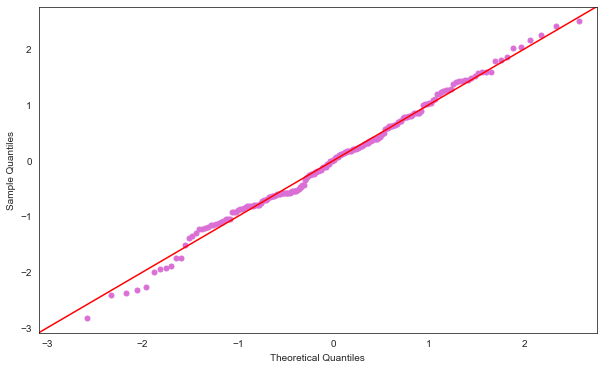

In [90]:
qqplot(data=tv_vs_sales.resid, fit=True, line='45', markerfacecolor='orchid', markeredgecolor='orchid', markersize=5) 
plt.rcParams["figure.figsize"]=(10,6)
plt.show()

The QQ-plot above shows that the residuals follow a normal distribution, which is also a indication of a good model fit.

Calculate SSE? 

# Multiple Linear Regression

My task here was to investigate the relationship between 'Sales', 'TV' and 'Radio'. 'TV' and 'Radio' are the two explanatory variables. 

I will start by running a model.

In [26]:
sales_tvradio = ols('Sales ~ TV + Radio', data=df).fit()

In [27]:
Radio = np.arange(0, 51)
TV = np.arange(0, 350, 50)

p = product(Radio, TV)
explanatory_2 = pd.DataFrame(p, columns=["Radio", "TV"])
prediction_2 = explanatory_2.assign(Sales=sales_tvradio.predict(explanatory_2))

I chose a 2D scatter plot with color as response variable to visualize my model.

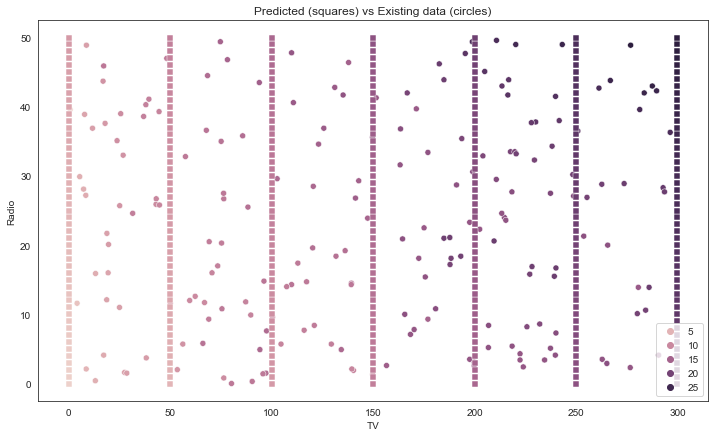

In [298]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
sns.scatterplot(x='TV', y='Radio', data=df, hue='Sales')
sns.scatterplot(x='TV', y='Radio', hue='Sales', data=prediction_2, legend=False, marker='s')
plt.legend(loc='lower right')
plt.title('Predicted (squares) vs Existing data (circles)')
plt.show()

The color of the squares (model data) clearly matches the color of the dots (actual data). This indicates that the model is a good fit.

In [92]:
rsquared2 = np.round(sales_tvradio.rsquared, 3)
mse2 = sales_tvradio.mse_resid
rse2 = np.round(np.sqrt(mse),3)
print('The linear regression with two explanatory variables have a r-squared ratio of ' + str(rsquared2))
print('The Redidual Standard Error is ' + str(rse2))

The linear regression with two explanatory variables have a r-squared ratio of 0.903
The Redidual Standard Error is 2.296


Given the visualisation and the numerical values of r-squared and RSE, I think this model has a good fit. 

# Logistic Regression
My task was to investigate the correlation between 'LIMIT_BAL' and defaults. Would I be able to predict if a customer would get a default by looking at their limit balance?

In [30]:
df2 = pd.read_csv('UCI_Credit_Card.csv')

In [93]:
#df2.shape
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaults
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [33]:
df2.rename(columns = {'default.payment.next.month':'defaults'}, inplace = True)

In [34]:
missing_values = df2.isna()
#df2[missing_values].sum()

I will start by visualising the data

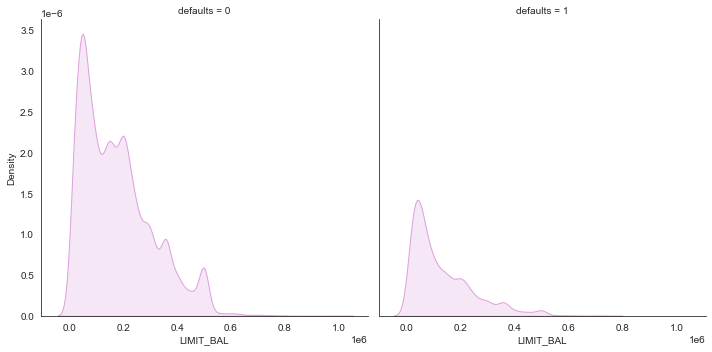

In [144]:
sns.displot(df2, x='LIMIT_BAL', col='defaults', color='plum', kind="kde", fill=True)
plt.show()

My conclusions of the plots above is that the majority of the people in the dataset does not have defaults. Since the graph for defaults=1 is a bit more right skewed than defaults=1, there might be a bigger risk for defaults if your limit_bal is low. The plot below also confirms this visually. 

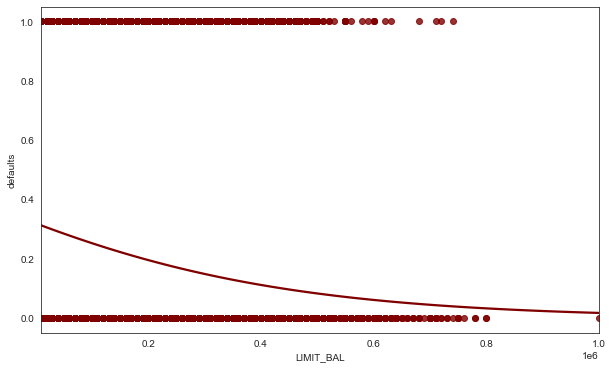

In [297]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.regplot(x='LIMIT_BAL', y='defaults', data=df2,
            ci= None, logistic=True, color='maroon')
ax.patch.set_alpha(0.2)
plt.show()

So the plot confirms that lower limit_bal means higher risk for defaults. It also shows that the probability of a default never goes above 0.5. This might be a problem for our model, since we know from the dataset that there actually are customer who have defaults.

I will now create a model for predicting if a customer will get a default or not, depending on their limit_bal.

In [177]:
limit_bal_vs_defaults = logit("defaults ~ LIMIT_BAL", data=df2).fit()
explanatory_data = pd.DataFrame({'LIMIT_BAL': np.arange(100, max(df2.LIMIT_BAL), 1000)})
prediction_data = explanatory_data.assign(defaults = limit_bal_vs_defaults.predict)

Optimization terminated successfully.
         Current function value: 0.515521
         Iterations 6


In [175]:
min(df2.LIMIT_BAL)

10000.0

<Figure size 360x360 with 0 Axes>

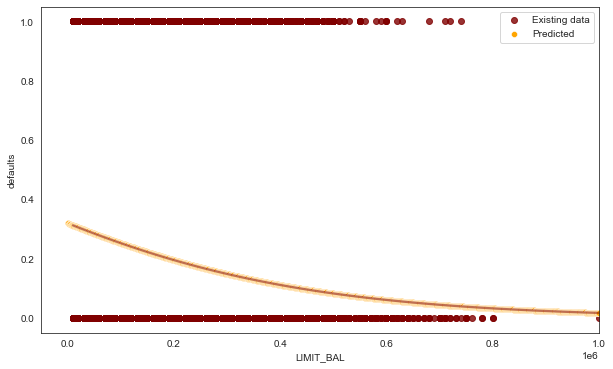

In [296]:
plt.clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
fig = sns.regplot(x='LIMIT_BAL', y='defaults', data=df2,
            ci= None, logistic=True, scatter_kws={"color": 'maroon'},
                  line_kws={"color": 'maroon', "alpha": 0.5}, label='Existing data')
fig =sns.scatterplot(x='LIMIT_BAL', y='defaults', data=prediction_data, color='orange', label='Predicted')
plt.legend()
plt.show()

According to the above plot, the model predictions clearly follows the trendline.

I will now calculate the most likely outcome based on the prediction data.

In [184]:
prediction_data['most_likely_outcome'] = np.round(prediction_data['defaults'])

<Figure size 360x360 with 0 Axes>

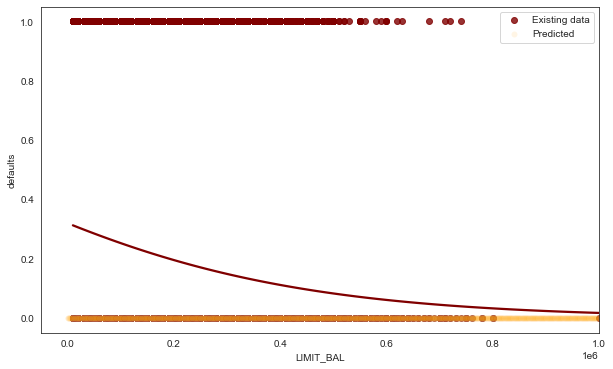

In [295]:
plt.clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.regplot(x='LIMIT_BAL', y='defaults', data=df2,
            ci= None, logistic=True, label='Existing data', color='maroon')
sns.scatterplot(x='LIMIT_BAL', y='most_likely_outcome', data=prediction_data, label='Predicted',
                color='orange', alpha=0.1)
plt.legend()
plt.show()


According to the plot above, our model fails to predict any defaults. This can also be shown with a confusion matrix:

In [136]:
conf_matrix = limit_bal_vs_defaults.pred_table()
print(conf_matrix)

[[23364.     0.]
 [ 6636.     0.]]


In [137]:
actual_response = df2['defaults']
predicted_response = np.round(limit_bal_vs_defaults.predict())
outcomes = pd.DataFrame({'actual_r': actual_response, 'predicted_r': predicted_response})
print(outcomes.value_counts(sort=False))

actual_r  predicted_r
0         0.0            23364
1         0.0             6636
dtype: int64


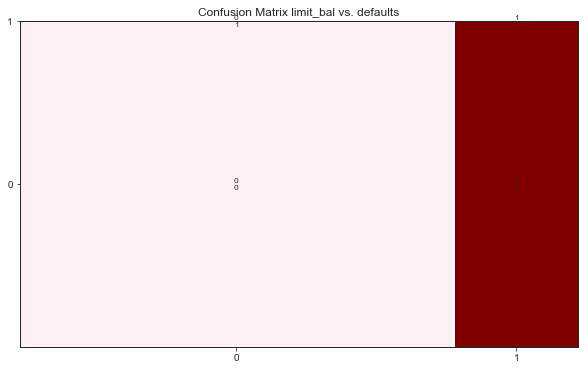

In [138]:
props = lambda key: {'color': 'maroon' if '1' in key else 'lavenderblush'}
mosaic(conf_matrix, properties=props, title='Confusion Matrix limit_bal vs. defaults')
plt.rcParams["figure.figsize"]=(5,5)
plt.show()

When looking at the confusion matrix both in numbers and visually, it's clear that the model did not predict one single default. This can also be quantified by calculating the accuracy:

In [423]:
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / (conf_matrix[0,0] + conf_matrix[1,1] + conf_matrix[1,0] + conf_matrix[0,0] + conf_matrix[0,1])
print('The model accuracy is: ' + str(np.round(accuracy, 3)) + '. In other words, not that accurate.')

The model accuracy is: 0.438. In other words, not that accurate.


So to conclude, there seems to be a linear trend between limit_bal and defaults, but it is not enough data to make accurate predictions.

# Polynomial Regression

I was asked to try to predict the earn for age 3

In [263]:
df3 = pd.read_csv('Wages_data_Polynomial.txt')
wages_mean=df3.groupby('age').earn.mean().reset_index()

In [264]:
wages_mean.head()

,age,earn
0,22,7802.362974
1,23,9000.440131
2,24,10545.255656
3,25,14412.743507
4,26,20582.105841


In [266]:
missing = wages_mean.isna()
wages_mean[missing].sum()

age     0.0
earn    0.0
dtype: float64

I will start by plotting the data

In [274]:
x = wages_mean[['age']]
y = wages_mean.earn

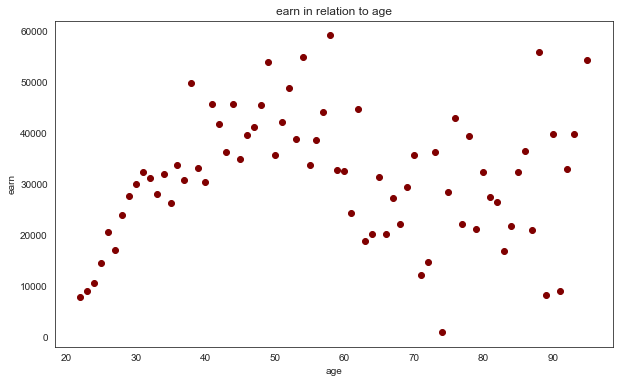

In [281]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
plt.scatter(x, y, color='maroon')
plt.ylabel('earn')
plt.xlabel('age')
plt.title('earn in relation to age')
plt.show()

Data looks pretty messy, no linear trend here.
I will now preprocess the data 

In [267]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pre_process = PolynomialFeatures(degree=2)
x_poly = pre_process.fit_transform(x)

Implementing the polymonial model

In [ ]:
pr_model = LinearRegression()
pr_model.fit(x_poly, y)
y_pred = pr_model.predict(x_poly)

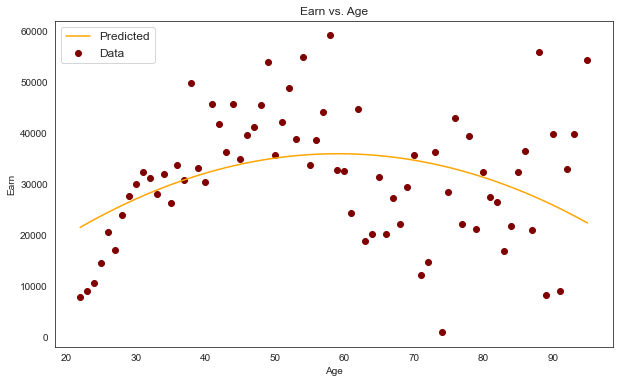

In [293]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
plt.scatter(x, y, c = "maroon", label='Data')
plt.xlabel("Age")
plt.ylabel("Earn")
plt.title('Earn vs. Age')
plt.plot(x, y_pred, color = 'orange', label='Predicted')
plt.legend(fontsize='large')
plt.show()

Here I'm prediciting and creating a variable for earn at age 3

In [302]:
y_new = pr_model.predict(pre_process.fit_transform([[3]]))
y_new

array([2906.66866135])

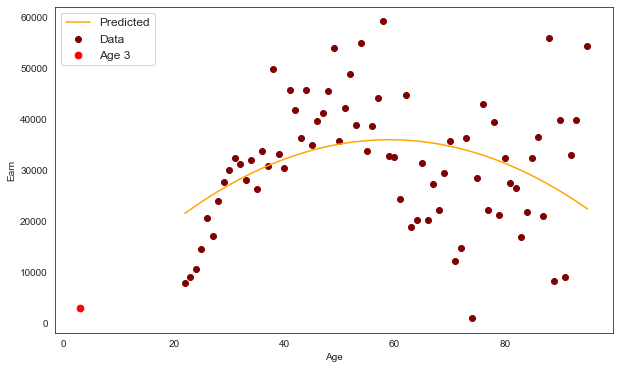

In [303]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
plt.scatter(x, y, c = "maroon", label='Data')
plt.xlabel("Age")
plt.ylabel("Earn")
plt.plot(x, y_pred, c='orange', label='Predicted')
plt.scatter(3, y_new, c = "red", s=45, label='Age 3')
plt.legend(fontsize='large')
plt.show()

In [259]:
y_new

array([2906.66866135])

In [307]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)

In [311]:
print('The predicted earn for someone at age 3 would be '
      + str(np.round(y_new[0])) + '. Does not seem accurate.')
print('The RSE also confirms that this is not a confident model. The RSE is as high as ' + str(np.round((np.sqrt(mse)))))

The predicted earn for someone at age 3 would be 2907.0. Does not seem accurate.
The RSE also confirms that this is not a confident model. The RSE is as high as 11827.0
